In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [3]:
avaliacoes = pd.read_csv('base.csv', delimiter=';')
avaliacoes.head()

avaliacoes.index = avaliacoes['Pessoa']
#del avaliacoes['Pessoa']
avaliacoes

,Pessoa,Freddy,Bourne,Trek,Exterminador,Norbit,Wars
Pessoa,,,,,,,
Ana,Ana,25.0,35,30.0,35,25.0,30.0
Marcos,Marcos,30.0,35,15.0,50,35.0,30.0
Pedro,Pedro,25.0,30,NaN,35,NaN,40.0
Claudia,Claudia,NaN,35,30.0,40,25.0,45.0
Adriano,Adriano,30.0,40,20.0,30,20.0,30.0
Janaina,Janaina,30.0,40,NaN,50,35.0,30.0
Leonardo,Leonardo,NaN,45,NaN,40,10.0,NaN


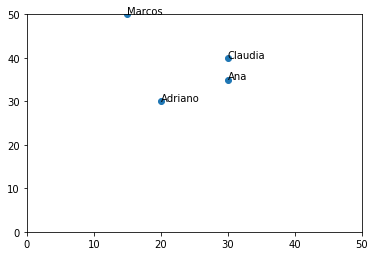

In [4]:
filme1 = 'Trek'
filme2 = 'Exterminador'
for n in range(len(avaliacoes)):
    if avaliacoes[filme1][n] >= 0 and avaliacoes[filme2][n] >= 0:
        plt.text(x = avaliacoes[filme1][n],
                y = avaliacoes[filme2][n],
                s = avaliacoes['Pessoa'][n])
plt.scatter(x = avaliacoes[filme1],
            y = avaliacoes[filme2])
plt.axis([0,50,0,50])
plt.show()

In [5]:
def dis_euc(f1, f2, p1, p2):
    soma = 0
    if avaliacoes[f1][p1] >= 0 and avaliacoes[f1][p2] >= 0:
        if avaliacoes[f2][p1] >= 0 and avaliacoes[f2][p2] >= 0:
            xi = np.array([avaliacoes[f1][p1], avaliacoes[f2][p1]])
            yi = np.array([avaliacoes[f1][p2], avaliacoes[f2][p2]])
            dim, soma = len(xi), 0
            for i in range(dim):
                soma += math.pow(xi[i] - yi[i], 2)
    return math.sqrt(soma)

In [6]:
for nome in avaliacoes['Pessoa']:
    print('Distancia entre Ana e %s: %f' % (nome, dis_euc(filme1, filme2, 'Ana', nome)))

Distancia entre Ana e Ana: 0.000000
Distancia entre Ana e Marcos: 21.213203
Distancia entre Ana e Pedro: 0.000000
Distancia entre Ana e Claudia: 5.000000
Distancia entre Ana e Adriano: 11.180340
Distancia entre Ana e Janaina: 0.000000
Distancia entre Ana e Leonardo: 0.000000


In [46]:
a1 = {'Ana': 
		{'Freddy': 2.5, 
		 'Bourne': 3.5,
		 'Trek': 3.0, 
		 'Exterminador': 3.5, 
		 'Norbit': 2.5, 
		 'Wars': 3.0},
	 
	  'Marcos': 
		{'Freddy': 3.0, 
		 'Bourne': 3.5, 
		 'Trek': 1.5, 
		 'Exterminador': 5.0, 
		 'Wars': 3.0, 
		 'Norbit': 3.5}, 

	  'Pedro': 
	    {'Freddy': 2.5, 
		 'Bourne': 3.0,
		 'Exterminador': 3.5, 
		 'Wars': 4.0},
			 
	  'Claudia': 
		{'Bourne': 3.5, 
		 'Trek': 3.0,
		 'Wars': 4.5, 
		 'Exterminador': 4.0, 
		 'Norbit': 2.5},
				 
	  'Adriano': 
		{'Freddy': 3.0, 
		 'Bourne': 4.0, 
		 'Trek': 2.0, 
		 'Exterminador': 3.0, 
		 'Wars': 3.0,
		 'Norbit': 2.0}, 

	  'Janaina': 
	     {'Freddy': 3.0, 
	      'Bourne': 4.0,
	      'Wars': 3.0, 
	      'Exterminador': 5.0, 
	      'Norbit': 3.5},
			  
	  'Leonardo': 
	    {'Bourne':4.5,
             'Norbit':1.0,
	     'Exterminador':4.0}
}


def euclidiana(base, usuario1, usuario2):
    si = {}
    for item in base[usuario1]:
        if item in base[usuario2]:
            si[item] = 1
    
    if len(si) == 0:
        return 0
    
    soma = sum([math.pow(base[usuario1][item] - base[usuario2][item], 2)
                   for item in base[usuario1] if item in base[usuario2]])
    
    return 1/(1 + math.sqrt(soma))

In [20]:
read

,Filmes,Ana,Marcos,Pedro,Claudia,Adriano,Janaina,Leonardo
Filmes,,,,,,,,
Freddy,Freddy,25,30,25.0,NaN,30,30.0,NaN
Bourne,Bourne,35,35,30.0,35.0,40,40.0,45.0
Trek,Trek,30,15,NaN,30.0,20,NaN,NaN
Exterminador,Exterminador,35,50,35.0,40.0,30,50.0,40.0
Norbit,Norbit,25,35,NaN,25.0,20,35.0,10.0
Wars,Wars,30,30,40.0,45.0,30,30.0,NaN


In [9]:
read = pd.read_csv('base.csv', delimiter=';')
read.index = read['Pessoa']
catalogo = {}
filmes = []

for i in read:
    if i != 'Pessoa':
        filmes.append(i)

for pessoa in read['Pessoa']:
    excluir = []
    notamovie = {}
    for i in range(len(filmes)):
        if read[filmes[i]][pessoa] >= 0:
            notamovie[filmes[i]] = read[filmes[i]][pessoa]
        else:
            excluir.append(filmes[i])
    catalogo[pessoa] = notamovie
    for i in range(len(excluir)):
        catalogo[pessoa][excluir[i]] = 0
        del catalogo[pessoa][excluir[i]]
print(catalogo)
print('\n')

inverso = {}
for f in filmes:
    excluir = []
    notapessoa = {}
    for pessoa in read['Pessoa']:
        if read[f][pessoa] >= 0:
            notapessoa[pessoa] = read[f][pessoa]
    inverso[f] = notapessoa
print(inverso)

{'Ana': {'Freddy': 25.0, 'Bourne': 35, 'Trek': 30.0, 'Exterminador': 35, 'Norbit': 25.0, 'Wars': 30.0}, 'Marcos': {'Freddy': 30.0, 'Bourne': 35, 'Trek': 15.0, 'Exterminador': 50, 'Norbit': 35.0, 'Wars': 30.0}, 'Pedro': {'Freddy': 25.0, 'Bourne': 30, 'Exterminador': 35, 'Wars': 40.0}, 'Claudia': {'Bourne': 35, 'Trek': 30.0, 'Exterminador': 40, 'Norbit': 25.0, 'Wars': 45.0}, 'Adriano': {'Freddy': 30.0, 'Bourne': 40, 'Trek': 20.0, 'Exterminador': 30, 'Norbit': 20.0, 'Wars': 30.0}, 'Janaina': {'Freddy': 30.0, 'Bourne': 40, 'Exterminador': 50, 'Norbit': 35.0, 'Wars': 30.0}, 'Leonardo': {'Bourne': 45, 'Exterminador': 40, 'Norbit': 10.0}}


{'Freddy': {'Ana': 25.0, 'Marcos': 30.0, 'Pedro': 25.0, 'Adriano': 30.0, 'Janaina': 30.0}, 'Bourne': {'Ana': 35, 'Marcos': 35, 'Pedro': 30, 'Claudia': 35, 'Adriano': 40, 'Janaina': 40, 'Leonardo': 45}, 'Trek': {'Ana': 30.0, 'Marcos': 15.0, 'Claudia': 30.0, 'Adriano': 20.0}, 'Exterminador': {'Ana': 35, 'Marcos': 50, 'Pedro': 35, 'Claudia': 40, 'Adriano': 30

In [10]:
read = pd.read_csv('b.csv', delimiter=';')
read.index = read['Filmes']
catalogo = {}
filmes = []
people = []

for filme in read['Filmes']:
    filmes.append(filme)

for i in read:
    if i != 'Filmes':
        people.append(i)

for pessoa in people:
    excluir = []
    notamovie = {}
    for i in range(len(filmes)): 
        if read[pessoa][filmes[i]] >= 0:
            notamovie[filmes[i]] = read[pessoa][filmes[i]]
        else:
            excluir.append(filmes[i])
    catalogo[pessoa] = notamovie
    for i in range(len(excluir)):
        catalogo[pessoa][excluir[i]] = 0
        del catalogo[pessoa][excluir[i]]
print(catalogo)
print('\n')

inverso = {}
for f in filmes:
    excluir = []
    notapessoa = {}
    for pessoa in people:
        if read[pessoa][f] >= 0:
            notapessoa[pessoa] = read[pessoa][f]
    inverso[f] = notapessoa
print(inverso)

{'Ana': {'Freddy': 25, 'Bourne': 35, 'Trek': 30, 'Exterminador': 35, 'Norbit': 25, 'Wars': 30}, 'Marcos': {'Freddy': 30, 'Bourne': 35, 'Trek': 15, 'Exterminador': 50, 'Norbit': 35, 'Wars': 30}, 'Pedro': {'Freddy': 25.0, 'Bourne': 30.0, 'Exterminador': 35.0, 'Wars': 40.0}, 'Claudia': {'Bourne': 35.0, 'Trek': 30.0, 'Exterminador': 40.0, 'Norbit': 25.0, 'Wars': 45.0}, 'Adriano': {'Freddy': 30, 'Bourne': 40, 'Trek': 20, 'Exterminador': 30, 'Norbit': 20, 'Wars': 30}, 'Janaina': {'Freddy': 30.0, 'Bourne': 40.0, 'Exterminador': 50.0, 'Norbit': 35.0, 'Wars': 30.0}, 'Leonardo': {'Bourne': 45.0, 'Exterminador': 40.0, 'Norbit': 10.0}}


{'Freddy': {'Ana': 25, 'Marcos': 30, 'Pedro': 25.0, 'Adriano': 30, 'Janaina': 30.0}, 'Bourne': {'Ana': 35, 'Marcos': 35, 'Pedro': 30.0, 'Claudia': 35.0, 'Adriano': 40, 'Janaina': 40.0, 'Leonardo': 45.0}, 'Trek': {'Ana': 30, 'Marcos': 15, 'Claudia': 30.0, 'Adriano': 20}, 'Exterminador': {'Ana': 35, 'Marcos': 50, 'Pedro': 35.0, 'Claudia': 40.0, 'Adriano': 30, 'Janai

In [11]:
def getSimilaridades(base, usuario):
    similaridade = [(euclidiana(base, usuario, outro), outro)
                   for outro in base if outro != usuario]
    similaridade.sort()
    similaridade.reverse()
    return similaridade[0:30]

In [12]:
getSimilaridades(a1, 'Ana')

[(0.4721359549995794, 'Pedro'),
 (0.4142135623730951, 'Adriano'),
 (0.38742588672279304, 'Claudia'),
 (0.3483314773547883, 'Leonardo'),
 (0.3405424265831667, 'Janaina'),
 (0.29429805508554946, 'Marcos')]

In [13]:
euclidiana(a1, 'Pedro', 'Claudia')

0.5358983848622454

In [14]:
def getRecomendacoes(base, usuario): #usuario
    totais = {}
    somaSimilaridade = {}
    for outro in base:
        if outro == usuario: continue
        similaridade = euclidiana(base, usuario, outro)
        if similaridade <= 0: continue
        for item in base[outro]:
            if item not in base[usuario]:
                totais.setdefault(item, 0)
                totais[item] += base[outro][item] * similaridade
                somaSimilaridade.setdefault(item, 0)
                somaSimilaridade[item] += similaridade
    rankings = [(total/somaSimilaridade[item], item) for item, total in totais.items()]
    rankings.sort()
    rankings.reverse()
    return rankings[0:30]

In [15]:
getRecomendacoes(a1, 'Pedro')

[(2.4825817086405517, 'Star Trek'), (2.453379230569188, 'Norbit')]

In [21]:
def mediaRecomendacao(base, usuario):
    x = 0
    soma = 0
    for film in base[usuario]:
            x = x + 1
            soma += base[usuario][film]
    return soma/x

In [22]:
mediaRecomendacao(a1, 'Leonardo')

3.1666666666666665

In [23]:
a2 = {'Freddy': 
		{'Ana': 2.5, 
		 'Marcos:': 3.0 ,
		 'Pedro': 2.5, 
		 'Adriano': 3.0, 
		 'Janaina': 3.0 },
	 
	 'Bourne': 
		{'Ana': 3.5, 
		 'Marcos': 3.5,
		 'Pedro': 3.0, 
		 'Claudia': 3.5, 
		 'Adriano': 4.0, 
		 'Janaina': 4.0,
		 'Leonardo': 4.5 },
				 
	 'Trek': 
		{'Ana': 3.0, 
		 'Marcos:': 1.5,
		 'Claudia': 3.0, 
		 'Adriano': 2.0 },
	
	 'Exterminador': 
		{'Ana': 3.5, 
		 'Marcos:': 5.0 ,
		 'Pedro': 3.5, 
		 'Claudia': 4.0, 
		 'Adriano': 3.0, 
		 'Janaina': 5.0,
		 'Leonardo': 4.0},
				 
	 'Norbit': 
		{'Ana': 2.5, 
		 'Marcos:': 3.0 ,
		 'Claudia': 2.5, 
		 'Adriano': 2.0, 
		 'Janaina': 3.5,
		 'Leonardo': 1.0},
				 
	 'Wars': 
		{'Ana': 3.0, 
		 'Marcos:': 3.5,
		 'Pedro': 4.0, 
		 'Claudia': 4.5, 
		 'Adriano': 3.0, 
		 'Janaina': 3.0}
}

In [24]:
a2['Wars']

{'Adriano': 3.0,
 'Ana': 3.0,
 'Claudia': 4.5,
 'Janaina': 3.0,
 'Marcos:': 3.5,
 'Pedro': 4.0}

In [25]:
getSimilaridades(a2, 'Wars')

[(0.3761785115301142, 'Freddy'),
 (0.3266316347104093, 'Bourne'),
 (0.29429805508554946, 'Norbit'),
 (0.27429188517743175, 'Exterminador'),
 (0.2708131845707603, 'Trek')]

In [26]:
def carregaMovie(path='C:/Users/lidia/OneDrive/Faculdade/Learning/Python/jupyter/Sistemas de Recomendação/ml-100k'):
    filmes = {}
    for linha in open(path + '/u.item'):
        (id, titulo) = linha.split('|')[0:2]
        filmes[id] = titulo
    #print(filmes)
    base = {}
    for linha in open(path + '/u.data'):
        (usuario, idfilme, nota, tempo) = linha.split('\t')
        base.setdefault(usuario, {})
        base[usuario][filmes[idfilme]] = float(nota)
    return base

In [27]:
getSimilaridades(carregaMovie(), '212')

[(1.0, '915'),
 (1.0, '866'),
 (1.0, '856'),
 (1.0, '850'),
 (1.0, '849'),
 (1.0, '837'),
 (1.0, '820'),
 (1.0, '818'),
 (1.0, '81'),
 (1.0, '809'),
 (1.0, '808'),
 (1.0, '801'),
 (1.0, '78'),
 (1.0, '770'),
 (1.0, '759'),
 (1.0, '75'),
 (1.0, '722'),
 (1.0, '71'),
 (1.0, '612'),
 (1.0, '61'),
 (1.0, '596'),
 (1.0, '584'),
 (1.0, '583'),
 (1.0, '580'),
 (1.0, '575'),
 (1.0, '572'),
 (1.0, '57'),
 (1.0, '547'),
 (1.0, '544'),
 (1.0, '53')]

In [28]:
getSimilaridades(carregaMovie(), '1')

[(1.0, '812'),
 (1.0, '418'),
 (1.0, '155'),
 (0.5, '729'),
 (0.5, '631'),
 (0.5, '351'),
 (0.5, '309'),
 (0.5, '273'),
 (0.4142135623730951, '876'),
 (0.4142135623730951, '485'),
 (0.4142135623730951, '111'),
 (0.36602540378443865, '687'),
 (0.36602540378443865, '105'),
 (0.3333333333333333, '895'),
 (0.3333333333333333, '811'),
 (0.3333333333333333, '685'),
 (0.3333333333333333, '531'),
 (0.3333333333333333, '39'),
 (0.3333333333333333, '356'),
 (0.3333333333333333, '341'),
 (0.3333333333333333, '282'),
 (0.3333333333333333, '260'),
 (0.3333333333333333, '107'),
 (0.3090169943749474, '9'),
 (0.3090169943749474, '842'),
 (0.3090169943749474, '820'),
 (0.3090169943749474, '696'),
 (0.3090169943749474, '547'),
 (0.3090169943749474, '520'),
 (0.3090169943749474, '516')]

In [29]:
getRecomendacoes(carregaMovie(), '212') #id do usuario (da pra ajeitar facil -espero, mas eu n conheco essa base de dados)

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, "Someone Else's America (1995)"),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Prefontaine (1997)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)'),
 (5.0, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 (5.0, 'Aiqing wansui (1994)'),
 (4.678464513946264, 'Delta of Venus (1994)'),
 (4.669110773445877, 'Innocents, The (1961)'),
 (4.6679881166781785, 'Pather Panchali (1955)'),
 (4.643210827674669, 'Letter From Death Row, A (1998)'),
 (4.636191497550252, 'Maya Lin: A Strong Clear Vision (1994)'),
 (4.6151289598408765, 'Anna (1996)'),
 (4.558310593401602, "Some Mother's Son (1996)"),
 (4.493969532782648, 'Shawshank Redemption, The (1994)'),
 (4.481115124220606, 'Leading Man, The (1996)'),
 (4.45837363085848, 'For the Moment (1994)'),
 (4.457258689756284, 'Third Man, The (1949)'),
 (4.445996248823582, 'Casablanca (1

In [30]:
getRecomendacoes(carregaMovie(), '1')

[(5.000000000000001, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'They Made Me a Criminal (1939)'),
 (5.0, "Someone Else's America (1995)"),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Prefontaine (1997)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)'),
 (5.0, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 (5.0, 'Aiqing wansui (1994)'),
 (4.999999999999999, 'Star Kid (1997)'),
 (4.709540786352371, 'Pather Panchali (1955)'),
 (4.623660893418929, "Some Mother's Son (1996)"),
 (4.605117943969987, 'Anna (1996)'),
 (4.542493480195261, 'Letter From Death Row, A (1998)'),
 (4.514686319613309, 'Close Shave, A (1995)'),
 (4.503301065093885, "Schindler's List (1993)"),
 (4.474029296757844, 'Casablanca (1942)'),
 (4.44823347681708, 'Third Man, The (1949)'),
 (4.4388914364740515, 'Faust (1994)'),
 (4.412532456819868, 'Everest (1998)'),
 (4.402793159814662, 'Rear Window (1954)'),
 (4.364687978517131, 'Bitter Sugar (Azucar Amargo) (1996)')

In [31]:
getSimilaridades(a2, 'Bourne')

[(0.3761785115301142, 'Exterminador'),
 (0.3567891723253309, 'Freddy'),
 (0.3266316347104093, 'Wars'),
 (0.32037724101704074, 'Trek'),
 (0.1886378647726465, 'Norbit')]

In [32]:
def calculaItensSimilares(base):
    result = {}
    for item in base:
        notas = getSimilaridades(base, item)
        result[item] = notas
    return result

In [33]:
calculaItensSimilares(a2)

{'Bourne': [(0.3761785115301142, 'Exterminador'),
  (0.3567891723253309, 'Freddy'),
  (0.3266316347104093, 'Wars'),
  (0.32037724101704074, 'Trek'),
  (0.1886378647726465, 'Norbit')],
 'Exterminador': [(0.3761785115301142, 'Bourne'),
  (0.27429188517743175, 'Wars'),
  (0.2402530733520421, 'Freddy'),
  (0.20799159651347807, 'Trek'),
  (0.18464218557642828, 'Norbit')],
 'Freddy': [(0.4721359549995794, 'Norbit'),
  (0.3761785115301142, 'Wars'),
  (0.3567891723253309, 'Bourne'),
  (0.3483314773547883, 'Trek'),
  (0.2402530733520421, 'Exterminador')],
 'Norbit': [(0.4721359549995794, 'Freddy'),
  (0.3761785115301142, 'Trek'),
  (0.29429805508554946, 'Wars'),
  (0.1886378647726465, 'Bourne'),
  (0.18464218557642828, 'Exterminador')],
 'Trek': [(0.3761785115301142, 'Norbit'),
  (0.3483314773547883, 'Freddy'),
  (0.32037724101704074, 'Bourne'),
  (0.2708131845707603, 'Wars'),
  (0.20799159651347807, 'Exterminador')],
 'Wars': [(0.3761785115301142, 'Freddy'),
  (0.3266316347104093, 'Bourne'),
 

In [53]:
def getRecomendacoesItens(baseUser, similaridadeItens, usuario):  #se os dados forem esparsos (poucas pessoas dao notas)
    notasUsuario = baseUser[usuario]
    notas = {}
    totalSimilaridades = {}
    for (item, nota) in notasUsuario.items(): #item = filmes q usuario assistiu
        for (similaridade, item2) in similaridadeItens[item]: #item2 = filmes q usuario nao assistiu
            if item2 in notasUsuario: continue
            notas.setdefault(item2, 0)
            notas[item2] += similaridade * nota
            totalSimilaridades.setdefault(item2, 0)
            totalSimilaridades[item2] += similaridade
    rankings = [(score/totalSimilaridades[item], item)
               for item, score in notas.items()]
    rankings.sort()
    rankings.reverse()
    return rankings

In [54]:
getRecomendacoes(a1, 'Leonardo')

[(3.457128694491423, 'Wars'),
 (2.778584003814924, 'Freddy'),
 (2.422482042361917, 'Trek')]

In [55]:
listaItens = calculaItensSimilares(a2)
getRecomendacoesItens(a1, listaItens, 'Leonardo')

[(3.1962008423190285, 'Wars'),
 (2.929467965289551, 'Trek'),
 (2.8420889258196413, 'Freddy')]